<a href="https://colab.research.google.com/github/CodeByAbi/House-Price-Prediction-in-Tebet-using-Regression-Linear/blob/main/House%20Price%20Prediction%20in%20Tebet%20using%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Prediction in Tebet using Linear Regression**

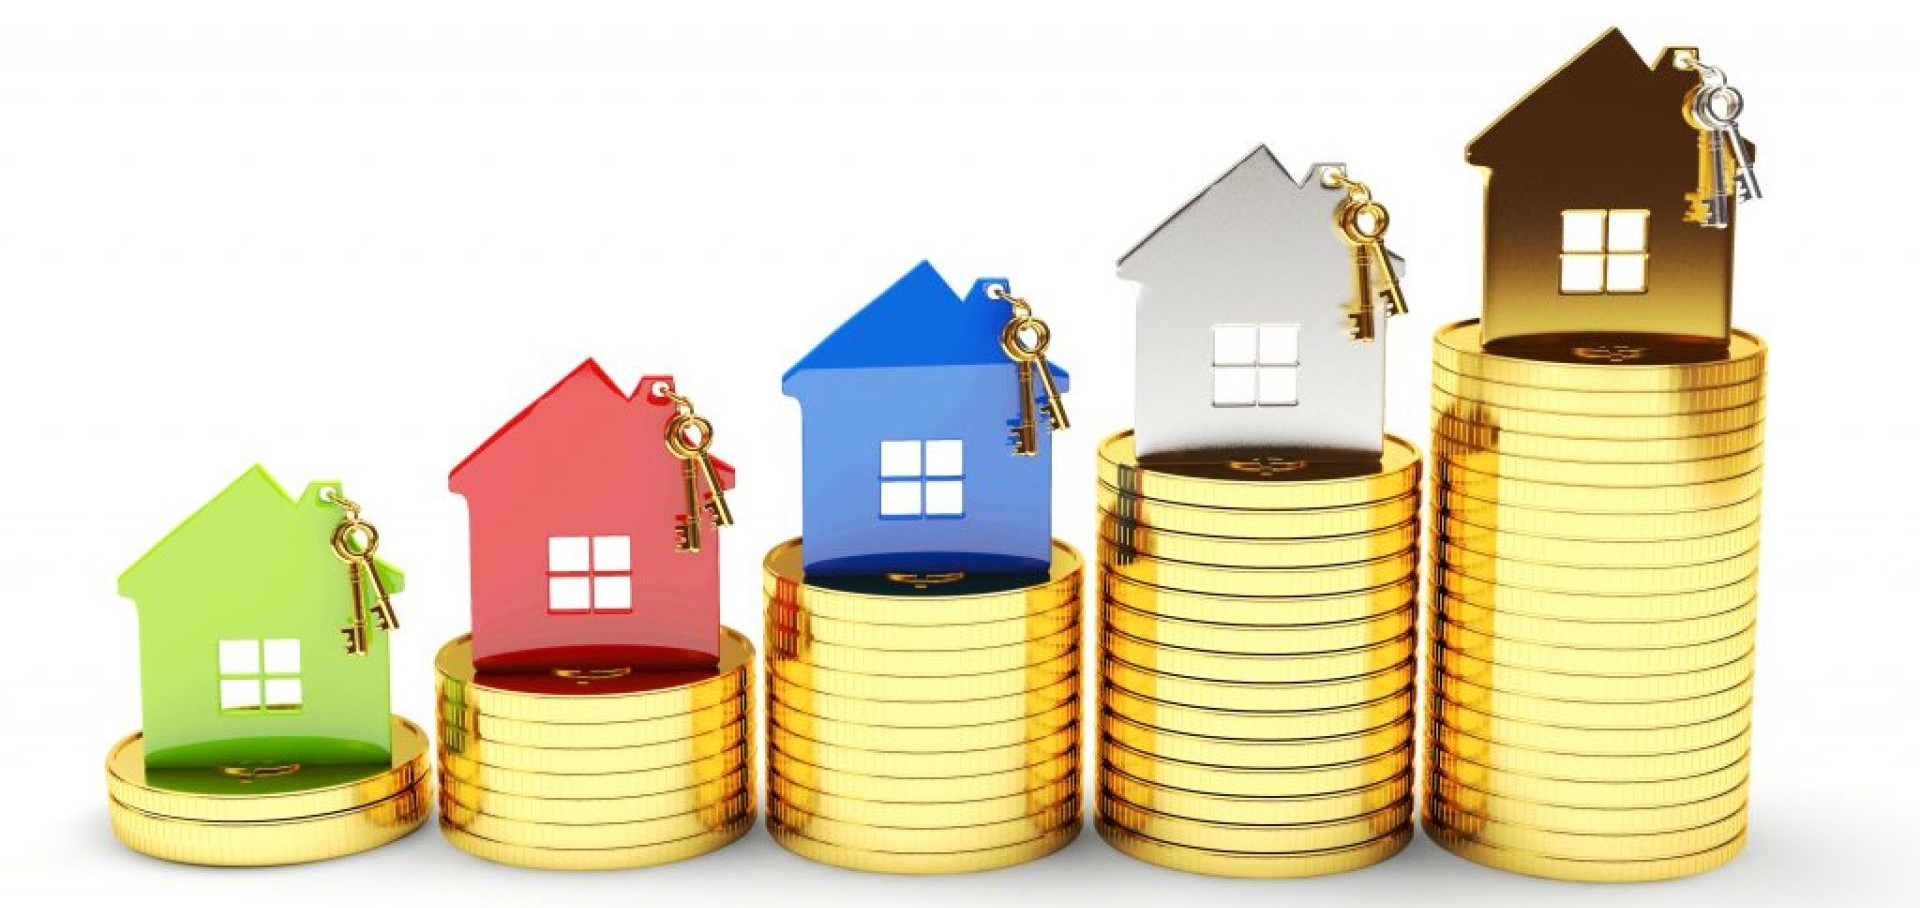

**Import all Library**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


**Membaca data dari file Excel ke dalam DataFrame pandas.**

In [2]:
df = pd.read_excel('/content/drive/MyDrive/House Prediction in Tebet/DATA RUMAH.xlsx')

In [3]:
df.head()

,nomor,nama_rumah,harga,lb,lt,kt,km,grs
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


df.head() digunakan untuk menampilkan beberapa baris pertama dari DataFrame df. Secara default, df.head() menampilkan lima baris pertama.

# **DATA PREPROCESSING**

Data preprocessing adalah proses persiapan dan transformasi data mentah menjadi format yang lebih sesuai untuk analisis. Tujuannya adalah untuk memastikan data siap digunakan dalam model atau aplikasi analisis data. Langkah-langkah dalam data preprocessing meliputi cleaning data (misalnya mengatasi missing values), transformasi data (misalnya normalisasi), reduksi dimensi (misalnya PCA), dan pemilihan fitur (misalnya untuk mengurangi noise). Dengan data yang sudah dipreproses dengan baik, analisis dan pembuatan model dapat dilakukan dengan lebih akurat dan efisien.

In [4]:
df.info()
print("Shape of data:")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nomor       1010 non-null   int64 
 1   nama_rumah  1010 non-null   object
 2   harga       1010 non-null   int64 
 3   lb          1010 non-null   int64 
 4   lt          1010 non-null   int64 
 5   kt          1010 non-null   int64 
 6   km          1010 non-null   int64 
 7   grs         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB
Shape of data:
(1010, 8)


df.info() adalah fungsi yang memberikan informasi singkat mengenai DataFrame, termasuk jumlah baris dan kolom, nama-nama kolom, tipe data dari setiap kolom, dan jumlah nilai non-null di setiap kolom.
Ini berguna untuk memahami struktur DataFrame dan mendeteksi data yang hilang.

**Menghitung Jumlah Data Duplicate**

In [5]:
print("Jumlah data duplicated:", df.duplicated().sum(), end="")
df.isna().sum()

Jumlah data duplicated: 0

nomor         0
nama_rumah    0
harga         0
lb            0
lt            0
kt            0
km            0
grs           0
dtype: int64

Jumplah data duplicate nya 0, jadi data ini bisa langsung kita analisis

In [6]:
#Mengganti satuan harga agar lebih readable
df['harga'] = (df['harga']/1000000).astype(int)
df.drop(columns=['nomor'], inplace=True)
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3


In [7]:
q1 = df['harga'].quantile(0.25)
median = df['harga'].median()
q3 = df['harga'].quantile(0.75)

def classification_harga(harga):
    if harga <= q1:
        return 'Murah'
    elif harga <= median:
        return 'Menengah'
    else:
        return 'Mahal'

# Menambahkan kolom baru 'Klasifikasi Harga'
df['tingkat_harga'] = df['harga'].apply(classification_harga)

# Menampilkan DataFrame dengan kolom baru
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs,tingkat_harga
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0,Menengah
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2,Menengah
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4,Murah
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0,Murah
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3,Mahal


Dengan menggunakan kuartil pertama (Q1) dan median dari kolom harga, kode ini mengklasifikasikan harga properti menjadi tiga kategori:

'Murah', 'Menengah', dan 'Mahal'.

*   Properti dengan harga di bawah atau sama dengan Q1 dikategorikan sebagai 'Murah'.
*   Properti dengan harga di atas Q1 tapi di bawah atau sama dengan median dikategorikan sebagai 'Menengah'.
*   Properti dengan harga di atas median dikategorikan sebagai 'Mahal'.











**Mendeskripsikan data**


In [8]:
df.describe()

,harga,lb,lt,kt,km,grs
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7629.227723,276.539604,237.432673,4.668317,3.607921,1.920792
std,7341.094562,177.864557,179.957604,1.572776,1.420066,1.510998
min,430.000000,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3262.500000,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5000.000000,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9000.000000,350.000000,290.000000,5.000000,4.000000,2.000000
max,65000.000000,1126.000000,1400.000000,10.000000,10.000000,10.000000


```
# df.describe()
```
Kita dapat melihat beberapa statistik penting tentang kolom harga:

*   Harga Terendah: 430 juta
*   Quartil 25% (Q1): 3.2 miliar
*   Median: 5 miliar
*   Quartil 75% (Q3): 9 miliar
*   Harga Termahal: 65 miliar

Selain itu, kita juga dapat mengamati bahwa semua kolom atau data yang digunakan, kecuali kolom nama_rumah, memiliki korelasi yang positif dengan harga.

# **DATA EXPLORATION**

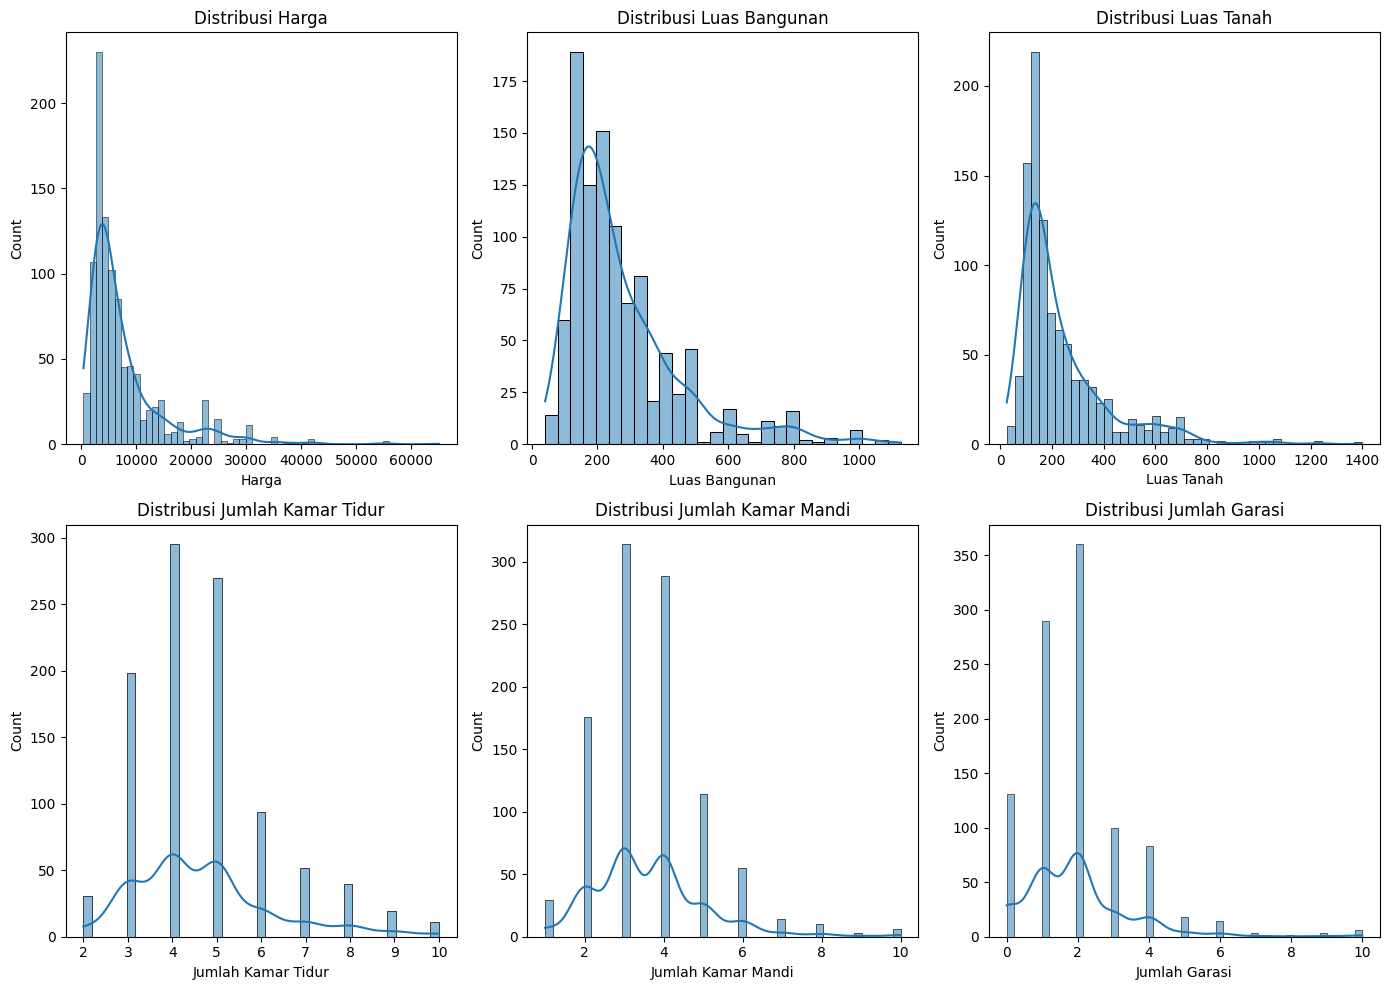

In [9]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['harga'], kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.histplot(df['lb'], kde=True)
plt.title('Distribusi Luas Bangunan')
plt.xlabel('Luas Bangunan')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.histplot(df['lt'], kde=True)
plt.title('Distribusi Luas Tanah')
plt.xlabel('Luas Tanah')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
sns.histplot(df['kt'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Count')

plt.subplot(2, 3, 5)
sns.histplot(df['km'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Count')

plt.subplot(2, 3, 6)
sns.histplot(df['grs'], kde=True)
plt.title('Distribusi Jumlah Garasi')
plt.xlabel('Jumlah Garasi')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi dari beberapa variabel terkait properti. Berikut adalah kesimpulan dari masing-masing grafik:

1.   **Distribusi Harga**
*   Distribusi harga properti memiliki kemiringan yang sangat tinggi ke kanan (positively skewed), menunjukkan bahwa sebagian besar properti memiliki harga di kisaran rendah, dengan beberapa properti memiliki harga yang sangat tinggi.
*   Harga properti mayoritas berada di bawah 10,000 dengan beberapa outlier di atas 60,000.


2.   **Distribusi Luas Bangunan**
*   Distribusi luas bangunan juga memiliki kemiringan ke kanan, menunjukkan bahwa sebagian besar properti memiliki luas bangunan yang lebih kecil.
*   Mayoritas properti memiliki luas bangunan di bawah 300 meter persegi, dengan beberapa properti memiliki luas hingga 1000 meter persegi.

3.   **Distribusi Luas Tanah**
*   Distribusi luas tanah serupa dengan distribusi luas bangunan, dengan kemiringan ke kanan yang signifikan.
*   Sebagian besar properti memiliki luas tanah di bawah 400 meter persegi, dengan beberapa properti memiliki luas tanah hingga 1400 meter persegi.

4.  **Distribusi Jumlah Kamar Tidur**
*   Distribusi jumlah kamar tidur menunjukkan bahwa sebagian besar properti memiliki antara 2 hingga 6 kamar tidur.
*   Jumlah kamar tidur yang paling umum adalah 3 dan 4.

5.   **Distribusi Jumlah Kamar Mandi**
*   Distribusi jumlah kamar mandi menunjukkan pola yang mirip dengan jumlah kamar tidur, dengan sebagian besar properti memiliki antara 2 hingga 4 kamar mandi.
*   Distribusi jumlah kamar mandi menunjukkan pola yang mirip dengan jumlah kamar tidur, dengan sebagian besar properti memiliki antara 2 hingga 4 kamar mandi.

6.   **Distribusi Jumlah Garasi**
*   Distribusi jumlah garasi menunjukkan bahwa sebagian besar properti memiliki antara 1 hingga 3 garasi.
*   Jumlah garasi yang paling umum adalah 1 dan 2.









**Membuat Korelasi Matriks antar variabel**

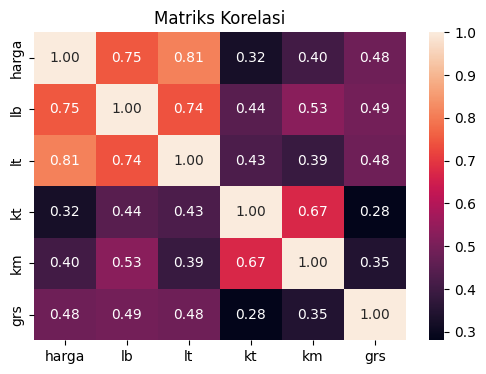

In [10]:
# Menghapus kolom 'tingkat_harga' dan 'daerah'
df_corr = df.drop(['tingkat_harga','nama_rumah'], axis=1)

# Menghitung matriks korelasi
correlation_all = df_corr.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_all, annot=True, cmap='rocket', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

Grafik yang ditampilkan adalah matriks korelasi yang menunjukkan hubungan antara berbagai variabel dalam dataset. Berikut adalah beberapa kesimpulan dari grafik tersebut:

1.  **Harga (harga)**
*   Memiliki korelasi positif yang tinggi dengan luas bangunan (lb) sebesar 0.75 dan luas tanah (lt) sebesar 0.81. Ini menunjukkan bahwa peningkatan luas bangunan dan luas tanah cenderung meningkatkan harga.
*   Korelasi yang lebih rendah dengan kamar tidur (kt) sebesar 0.32, kamar mandi (km) sebesar 0.40, dan garasi (grs) sebesar 0.48.

2.   **Luas Bangunan (lb)**
*   Memiliki korelasi tinggi dengan luas tanah (lt) sebesar 0.74, menunjukkan bahwa bangunan yang lebih besar cenderung dibangun di atas tanah yang lebih luas.
*   Korelasi sedang dengan kamar tidur (kt) sebesar 0.44, kamar mandi (km) sebesar 0.53, dan garasi (grs) sebesar 0.49.

3.   **Luas Tanah (lt)**
*   Memiliki korelasi sedang dengan kamar tidur (kt) sebesar 0.43, kamar mandi (km) sebesar 0.39, dan garasi (grs) sebesar 0.48.

4.   **Kamar Tidur (kt)**
*   Korelasi yang lebih rendah dengan harga (0.32), namun memiliki korelasi sedang dengan kamar mandi (km) sebesar 0.67, menunjukkan bahwa rumah dengan lebih banyak kamar tidur cenderung memiliki lebih banyak kamar mandi.

5.   **Kamar Mandi (km)**
*   Korelasi sedang dengan harga (0.40), luas bangunan (0.53), dan kamar tidur (0.67).

6.   **Garasi (grs)**
*   Korelasi yang lebih rendah dengan semua variabel kecuali luas tanah (0.48).





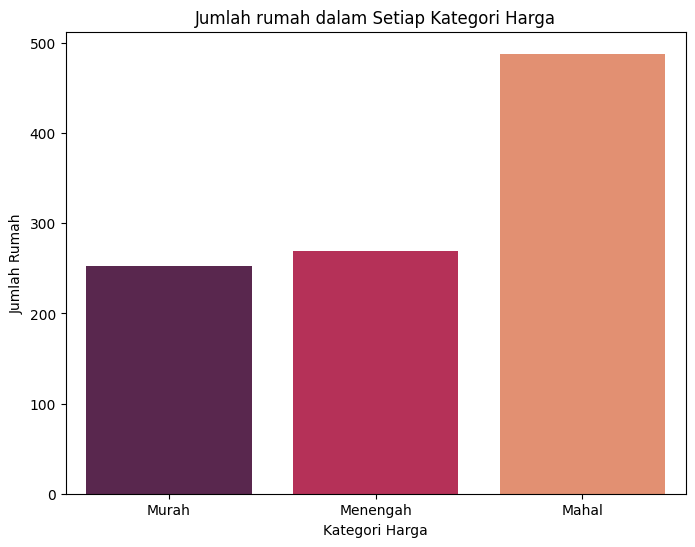

tingkat_harga
Mahal       488
Menengah    269
Murah       253
Name: count, dtype: int64

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tingkat_harga', order=['Murah', 'Menengah', 'Mahal'], palette='rocket')
plt.title('Jumlah rumah dalam Setiap Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Rumah')
plt.show()

df['tingkat_harga'].value_counts()

# **Modelling and Evaluation Model**

**Persiapan data untuk Permodelan**

In [12]:
X = df[['lb','lt','kt','km','grs']].values #Feature
y = df['harga'].values #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()












*   Kode ini mengambil fitur-fitur dari dataframe df, membagi data menjadi data latih dan data uji, dan melatih model regresi linier menggunakan data latih.

*   Fitur-fitur yang digunakan adalah 'lb', 'lt', 'kt', 'km', dan 'grs'.

*   Target yang diprediksi adalah 'harga'.
*   Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian.


*   Model regresi linier dilatih untuk memprediksi harga berdasarkan fitur-fitur tersebut.






**Model Regresi Linear**

In [13]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung MAE, MSE, dan R2 Score untuk data pelatihan
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Menghitung MAE, MSE, dan R2 Score untuk data pengujian
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model pada Data Pelatihan:")
print(f'MAE: {mae_train}')
print(f'MSE: {mse_train}')
print(f'R2 Score: {r2_train}')
print("\nEvaluasi Model pada Data Pengujian:")
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'R2 Score: {r2_test}')

Evaluasi Model pada Data Pelatihan:
MAE: 2117.3816375305473
MSE: 16455099.066539079
R2 Score: 0.704083518358408

Evaluasi Model pada Data Pengujian:
MAE: 1980.6375139271486
MSE: 10678762.329844257
R2 Score: 0.7712840762371456


**Regularisasi**

In [14]:
# Regularisasi dengan model Ridge
model_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])



*   Kode ini menggunakan pipeline untuk melakukan dua hal secara berurutan: menstandarkan fitur-fitur menggunakan StandardScaler dan kemudian melatih model Ridge Regression.

*   Ridge Regression menambahkan penalti terhadap besaran koefisien model untuk mengurangi overfitting.

*   Parameter alpha=0.1 menentukan kekuatan penalti regularisasi.
*   Model ini dilatih menggunakan data latih (X_train dan y_train) yang telah dibagi sebelumnya.



**Evaluasi Model**

In [15]:
# Evaluasi model Ridge
y_train_pred_ridge = model_ridge.predict(X_train)
y_pred_ridge = model_ridge.predict(X_test)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Evaluasi Model Ridge pada Data Pelatihan:")
print(f'MAE: {mae_train_ridge}')
print(f'MSE: {mse_train_ridge}')
print(f'R2 Score: {r2_train_ridge}')
print("\nEvaluasi Model Ridge pada Data Pengujian:")
print(f'MAE: {mae_ridge}')
print(f'MSE: {mse_ridge}')
print(f'R2 Score: {r2_ridge}')

Evaluasi Model Ridge pada Data Pelatihan:
MAE: 2117.3412888161793
MSE: 16455099.585216122
R2 Score: 0.704083509030899

Evaluasi Model Ridge pada Data Pengujian:
MAE: 1980.6382436057474
MSE: 10678988.55411181
R2 Score: 0.7712792310040808


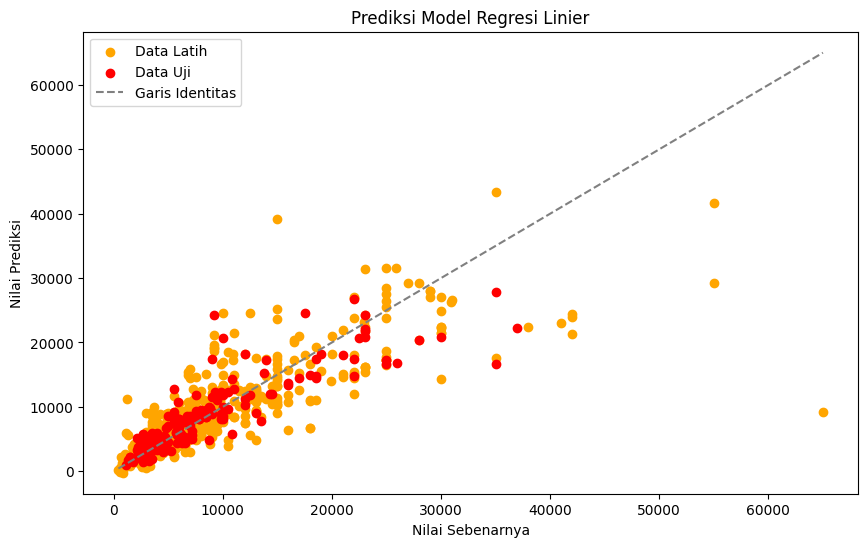

In [16]:
# Visualisasi regresi untuk data latih dan data uji
plt.figure(figsize=(10, 6))

# Plot data latih
plt.scatter(y_train, y_train_pred, color='orange', label='Data Latih')

# Plot data uji
plt.scatter(y_test, y_pred, color='red', label='Data Uji')

# Plot garis identitas
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray', label='Garis Identitas')

# Label sumbu x dan y
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')

# Judul plot
plt.title('Prediksi Model Regresi Linier')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

1.   **Garis Identitas**
*   Garis putus-putus abu-abu menunjukkan garis identitas (y = x), yang merupakan representasi dari prediksi sempurna. Titik-titik yang berada tepat di garis ini menunjukkan bahwa nilai prediksi model sama dengan nilai sebenarnya.

2.   **Distribusi Titik Data**

*   Titik-titik oranye (data latih) tersebar di sekitar garis identitas dengan beberapa titik yang menyimpang cukup jauh, terutama pada nilai yang lebih tinggi. Ini menunjukkan bahwa model memiliki beberapa kesalahan dalam memprediksi nilai sebenarnya, terutama pada data latih dengan nilai yang lebih tinggi.

*   Data Uji: Titik-titik merah (data uji) juga tersebar di sekitar garis identitas, namun terlihat lebih terkonsentrasi di bagian bawah grafik. Ini menunjukkan bahwa prediksi model untuk data uji umumnya lebih dekat dengan nilai sebenarnya dibandingkan data latih.








In [17]:
import ipywidgets as widgets
from IPython.display import display

# Definisikan fungsi untuk memprediksi harga berdasarkan fitur yang dipilih
def predict_house_price(lb, lt, kt, km, grs):
    # Lakukan prediksi harga menggunakan model regresi linier
    predicted_price = model.predict([[lb, lt, kt, km, grs]])

    # Tampilkan hasil prediksi
    print("Harga rumah impian anda diperkirakan sekitar IDR {:,.3f} juta".format(predicted_price[0]))

# Buat slider untuk setiap fitur
slider_lb = widgets.FloatSlider(value=100, min=df['lb'].min(), max=df['lb'].max(), step=10, description='LB:')
slider_lt = widgets.FloatSlider(value=300, min=20, max=df['lt'].max(), step=10, description='LT:')
slider_kt = widgets.FloatSlider(value=3, min=1, max=df['kt'].max(), step=1, description='KT:')
slider_km = widgets.FloatSlider(value=2, min=1, max=df['km'].max(), step=1, description='KM:')
slider_grs = widgets.FloatSlider(value=2, min=1, max=df['grs'].max(), step=1, description='GRS:')

# Buat tampilan interaktif
widgets.interactive(predict_house_price, lb=slider_lb, lt=slider_lt, kt=slider_kt, km=slider_km, grs=slider_grs)


interactive(children=(FloatSlider(value=100.0, description='LB:', max=1126.0, min=40.0, step=10.0), FloatSlide…